In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline


In [4]:
cd /Users/austinmcdonald/Desktop/data/LED Data/rhod2/fourth

/Users/austinmcdonald/Desktop/data/LED Data/rhod2/fourth


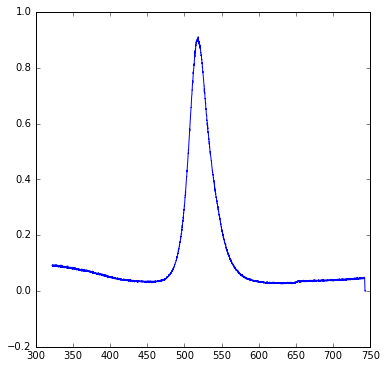

In [5]:
#set path to the files location

path = '/Users/austinmcdonald/Desktop/data/LED Data/rhodB/LED/greenled-7ms.csv' # this is the path

led = np.genfromtxt(path ,delimiter=",",skip_header=33,skip_footer=1)

ledwavelength = led[:,0]
ledintensity = led[:,1]

plt.figure(figsize=(6,6))
plt.plot(ledwavelength,ledintensity)


#plt.suptitle('LED Spectrum',size= 18)
#plt.xlabel('Wavelength', fontsize=18)
#plt.ylabel('Intensity', fontsize=18)
plt.show()

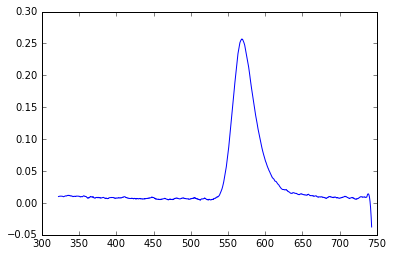

In [6]:
#set path to the files location

#
# with ba
#
path = '/Users/austinmcdonald/Desktop/data/LED Data/rhod2/fourth/with/' # this is the path
Nled=len(os.listdir(path))                            # this is the number of files
filenameled=list(os.listdir(path))                    # this puts the files into a list

# defining empty arrays 
analysisled = []
wavelength = []
intensity = []
# Importing all of the files and saving them to one array
for x in range(1,Nled):
    analysisled.append(pd.read_excel(path + filenameled[x],delimiter=",",header=None,skiprows=1,skip_footer=1))
    
# This picks out all of the xvals and yvals from the prevous array 
#... note it goes from 0 to x because mac puts an extra file in 
for y in range(0,x):
    wavelength.append(analysisled[y][0])
    intensity.append((analysisled[y][1]))
    
#Meanintw = np.mean(intensity,axis = 0)             # Finds the mean of the yvalues
Meanintw = savgol_filter(np.mean(intensity,axis = 0), 95, 3) 

#plt.figure(figsize=(6,6))
plt.plot(ledwavelength,Meanintw)

#plt.suptitle('LED Spectrum',size= 18)
#plt.xlabel('Wavelength', fontsize=18)
#plt.ylabel('Intensity', fontsize=18)
plt.show()

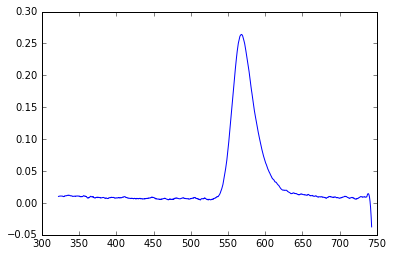

In [7]:
#set path to the files location

#
# without
#
path = '/Users/austinmcdonald/Desktop/data/LED Data/rhod2/fourth/witho/' # this is the path
Nled=len(os.listdir(path))                            # this is the number of files
filenameled=list(os.listdir(path))                    # this puts the files into a list

# defining empty arrays 
analysisled = []
wavelength = []
intensity = []
# Importing all of the files and saving them to one array
for x in range(1,Nled):
    analysisled.append(pd.read_excel(path + filenameled[x],delimiter=",",header=None,skiprows=1,skip_footer=1))
    
# This picks out all of the xvals and yvals from the prevous array 
#... note it goes from 0 to x because mac puts an extra file in 
for y in range(0,x):
    wavelength.append(analysisled[y][0])
    intensity.append((analysisled[y][1]))
    
#Meanintwo = np.mean(intensity,axis = 0)             # Finds the mean of the yvalues
Meanintwo = savgol_filter(np.mean(intensity,axis = 0), 95, 3) 

#plt.figure(figsize=(6,6))
plt.plot(ledwavelength,Meanintwo)

#plt.suptitle('LED Spectrum',size= 18)
#plt.xlabel('Wavelength', fontsize=18)
#plt.ylabel('Intensity', fontsize=18)
plt.show()

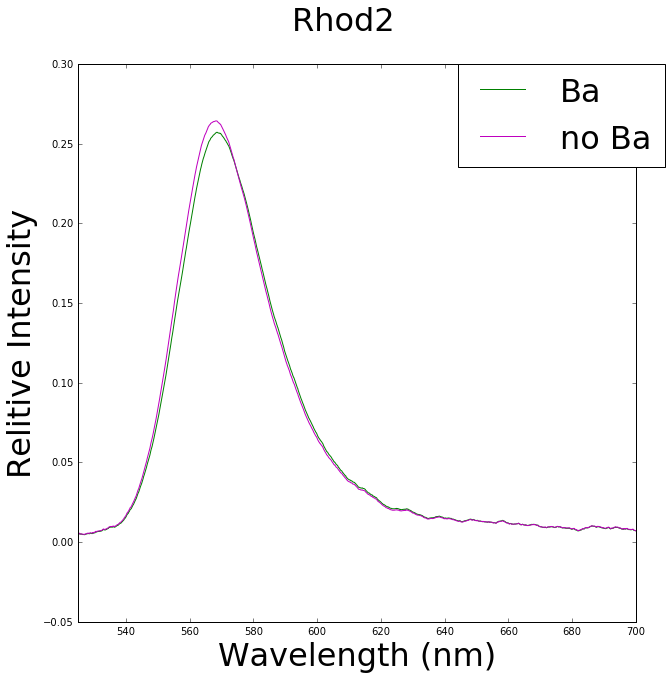

In [8]:
plt.figure(figsize=(10,10))

plt.plot(ledwavelength,Meanintw,label='Ba',color='g')
plt.plot(ledwavelength,Meanintwo,label='no Ba',color='m')

#plt.plot(ledwavelength,ledintensity,label='led',color='b')


#plt.axvline(520, color='g', linestyle=':')
#plt.text(525,.2,'520nm',rotation=0,fontsize=15,color='g')
#plt.axvline(467, color='b', linestyle=':')
#plt.text(472,.8,'467nm',rotation=0,fontsize=15,color='b')

plt.legend(bbox_to_anchor=(.681, 1), loc=2, borderaxespad=0.,fontsize=32)

plt.xlim([525,700])
#plt.ylim([-.02,1])

plt.suptitle('Rhod2 ',size= 32)
plt.xlabel('Wavelength (nm)', fontsize=32)
plt.ylabel('Relitive Intensity', fontsize=32)
#plt.savefig('Fluorescein Excitation Spectrum.pdf')
plt.show()

In [9]:
print('Ba =',sum(Meanintw))
print('No Ba =',sum(Meanintwo))


Ba = 109.178184685
No Ba = 110.755891384


In [12]:
(109-110 )/110

-0.00909090909090909